<a href="https://colab.research.google.com/github/abhay1999/Machine-Learning-Model-Knowledge-based-for-GNR-Interconnects/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


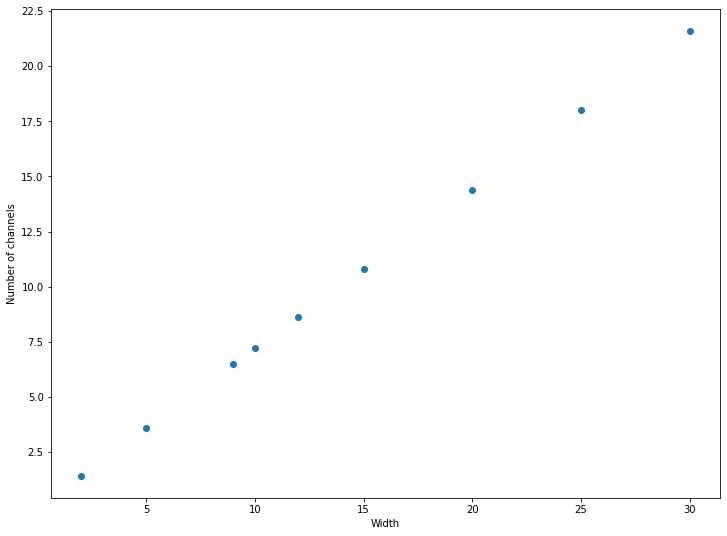

0.7182194726947374 0.034797478611771945


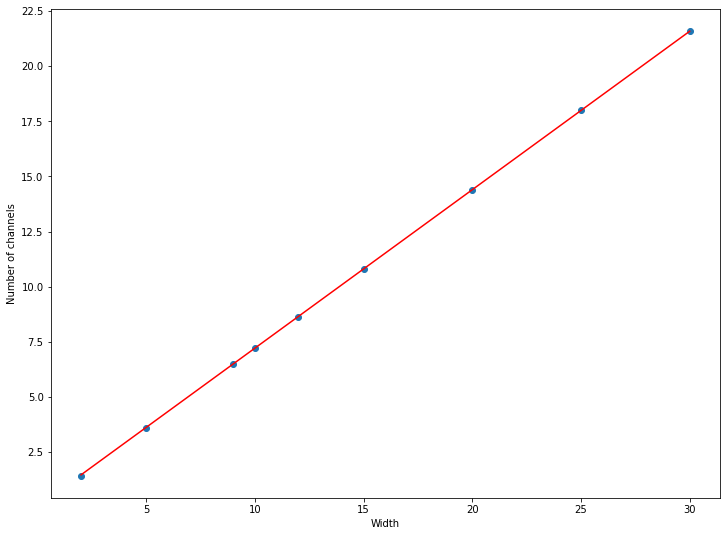

Root mean squared error
0.0003305492345511943
R score:
0.9999916046297304
Enter the value of width to predict the number of channels:7
number of channels are :
5.062333787474934
Values on X-axis for analytical data:
[10 20  2  5 15 12  9 30 25]
Values on Y-axis for analytical data:
[ 7.2  14.4   1.44  3.6  10.8   8.64  6.48 21.6  18.  ]
Values on X-axis for analytical data:
[10 20  2  5 15 12  9 30 25]
Values on Y-axis for predicted data:
[ 7.21699221 14.39918693  1.47123642  3.62589484 10.80808957  8.65343115
  6.49877273 21.58138166 17.9902843 ]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('/content/drive/MyDrive/Mini Project/ex1data2.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
Y=Y*0.6
plt.scatter(X, Y)
plt.xlabel('Width')
plt.ylabel('Number of channels')
plt.show()

# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.xlabel('Width')
plt.ylabel('Number of channels')# regression line
plt.show()

from sklearn.metrics import r2_score

r2 = r2_score(Y_pred, Y)

r2

def cal_rmse(actual_readings, predicted_readings):
    """
    Calculating the root mean square error
    :param actual_readings:
    :param predicted_readings:
    :return:
    """
    square_error_total = 0.0
    total_readings = len(actual_readings)
    for i in range(0, total_readings):
        error = predicted_readings[i] - actual_readings[i]
        square_error_total += pow(error, 2)
    rmse = square_error_total / float(total_readings)
    return rmse

r=cal_rmse(Y,Y_pred)

print('Root mean squared error')
print(r)

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

ys_orig=Y
ys_line=Y_pred
from statistics import mean

r2=coefficient_of_determination(ys_orig,ys_line)

print('R score:')
print(r2)
I=float(input('Enter the value of width to predict the number of channels:'))

print("number of channels are :")
print(m*I+c)
print('Values on X-axis for analytical data:')
print(np.array(X))
print('Values on Y-axis for analytical data:')
print(np.array(Y))
print('Values on X-axis for analytical data:')
print(np.array(X))
print('Values on Y-axis for predicted data:')
print(np.array(Y_pred))
from numpy import savetxt
savetxt('X.csv',np.array(X),delimiter=',')
savetxt('Y.csv',np.array(Y),delimiter=',')
savetxt('X_model.csv',np.array(X),delimiter=',')
savetxt('Y_model.csv',np.array(Y_pred),delimiter=',')

In [ ]:
a

array([12.02832034, 23.99864489,  2.45206071,  6.04315807, 18.01348262,
       14.42238525, 10.83128789, 35.96896943, 29.98380716])

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 47s 98ms/step - loss: 2.3107 - accuracy: 0.1078 - val_loss: 2.2815 - val_accuracy: 0.1487
Epoch 2/10
469/469 [==============================] - 45s 96ms/step - loss: 2.2907 - accuracy: 0.1240 - val_loss: 2.2622 - val_accuracy: 0.1967
Epoch 3/10
469/469 [==============================] - 45s 97ms/step - loss: 2.2728 - accuracy: 0.1478 - val_loss: 2.2437 - val_accuracy: 0.2878
Epoch 4/10
469/469 [==============================] - 46s 97ms/step - loss: 2.2577 - accuracy: 0.1698 - val_loss: 2.2245 - val_accuracy: 0.3695
Epoch 5/10
469/469 [==============================] - 45s 97ms/step - loss: 2.2393 - accuracy: 0.1937 - val_loss: 2.2027 - val_accuracy: 0.4196
Epoch 6/10
469/469 [==============================] - 46s 97ms/step - loss: 2.2213 - accuracy: 0.2187 - val_loss: 2.1

In [ ]:
from keras.models import load_model
#!pip install win32gui
!pip install win32crypt
from tkinter import *
import tkinter as tk
#import win32gui
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def _init_(self):
        tk.Tk._init_(self)

        self.x = self.y = 0
        
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting)   
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
       
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()  # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND)  # get the coordinate of the canvas
        a,b,c,d = rect
        rect=(a+4,b+4,c-4,d-4)
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
       
app = App()
mainloop()

ERROR: Could not find a version that satisfies the requirement win32crypt (from versions: none)
ERROR: No matching distribution found for win32crypt


TclError: ignored

In [ ]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform, conditional
import scipy.io
import numpy as np
from scipy.io import loadmat  
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os.path as op
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()
print(x_train.shape)
print(x_test.shape)
print(y_train[:image_index + 1])
# save input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train/255
x_test = x_test/255
from keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])
batch_size = 128
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test)
score=model.evaluate(x_test, y_test , batch_size=128, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

SyntaxError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn import svm
from sklearn import metrics
import joblib
import numpy as np
from sklearn.utils import shuffle
